In [51]:

using DataFrames, CSV, PyPlot

The analogue of IPython's `%matplotlib` in Julia is to use the [PyPlot package](https://github.com/stevengj/PyPlot.jl), which gives a Julia interface to Matplotlib including inline plots in IJulia notebooks.   (The equivalent of `numpy` is already loaded by default in Julia.)

Given PyPlot, the analogue of `%matplotlib inline` is `using PyPlot`, since PyPlot defaults to inline plots in IJulia.

To enable separate GUI windows in PyPlot, analogous to `%matplotlib`, do `using PyPlot; pygui(true)`.   To specify a particular gui backend, analogous to `%matplotlib gui`, you can either do `using PyPlot; pygui(:gui); using PyPlot; pygui(true)` (where `gui` is `wx`, `qt`, `tk`, or `gtk`), or you can do `ENV["MPLBACKEND"]=backend; using PyPlot; pygui(true)` (where `backend` is the name of a Matplotlib backend, like `tkagg`).

For more options, see the PyPlot documentation.


In [43]:
data = CSV.File("Advertising.csv") |> DataFrame

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


In [44]:
tv = data[!, "TV"]

200-element Vector{Float64}:
 230.1
  44.5
  17.2
 151.5
 180.8
   8.7
  57.5
 120.2
   8.6
 199.8
  66.1
 214.7
  23.8
   ⋮
 286.0
  18.7
  39.5
  75.5
  17.2
 166.8
 149.7
  38.2
  94.2
 177.0
 283.6
 232.1

In [45]:
sales = data[!, "sales"]

200-element Vector{Float64}:
 22.1
 10.4
  9.3
 18.5
 12.9
  7.2
 11.8
 13.2
  4.8
 10.6
  8.6
 17.4
  9.2
  ⋮
 15.9
  6.7
 10.8
  9.9
  5.9
 19.6
 17.3
  7.6
  9.7
 12.8
 25.5
 13.4

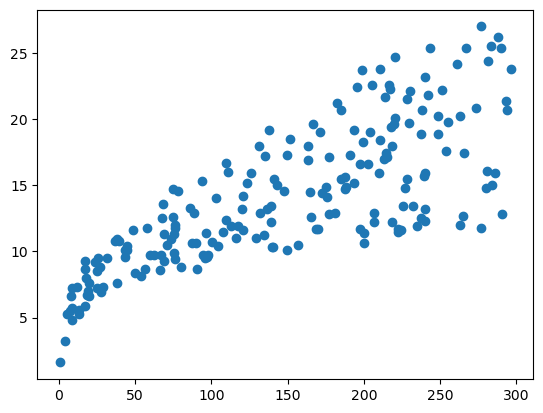

PyObject <matplotlib.collections.PathCollection object at 0x7fa7c9185730>

In [58]:
scatter(tv, sales)

In [29]:
# yˆi = βˆ0 + βˆ1x

In [30]:
# 𝛽̂=(𝑋^𝑇𝑋)−1𝑋^𝑇𝑦

In [31]:
X = hcat(fill(1.0, length(tv)),tv)

200×2 Matrix{Float64}:
 1.0  230.1
 1.0   44.5
 1.0   17.2
 1.0  151.5
 1.0  180.8
 1.0    8.7
 1.0   57.5
 1.0  120.2
 1.0    8.6
 1.0  199.8
 1.0   66.1
 1.0  214.7
 1.0   23.8
 ⋮    
 1.0  286.0
 1.0   18.7
 1.0   39.5
 1.0   75.5
 1.0   17.2
 1.0  166.8
 1.0  149.7
 1.0   38.2
 1.0   94.2
 1.0  177.0
 1.0  283.6
 1.0  232.1

In [32]:
Y = sales

200-element Vector{Float64}:
 22.1
 10.4
  9.3
 18.5
 12.9
  7.2
 11.8
 13.2
  4.8
 10.6
  8.6
 17.4
  9.2
  ⋮
 15.9
  6.7
 10.8
  9.9
  5.9
 19.6
 17.3
  7.6
  9.7
 12.8
 25.5
 13.4

In [33]:
B = inv(transpose(X) * X) * transpose(X) * Y

2-element Vector{Float64}:
 7.032593549127692
 0.04753664043301968

In [60]:
plot(x -> B[1] + B[2] * x)

LoadError: (in a Julia function called from Python)
JULIA: MethodError: no method matching iterate(::var"#11#12")
Closest candidates are:
  iterate(!Matched::Union{LinRange, StepRangeLen}) at range.jl:664
  iterate(!Matched::Union{LinRange, StepRangeLen}, !Matched::Int64) at range.jl:664
  iterate(!Matched::T) where T<:Union{Base.KeySet{var"#s79", var"#s78"} where {var"#s79", var"#s78"<:Dict}, Base.ValueIterator{var"#s77"} where var"#s77"<:Dict} at dict.jl:693
  ...
Stacktrace:
  [1] jlwrap_iterator(o::Function)
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:144
  [2] pyjlwrap_getiter(self_::Ptr{PyCall.PyObject_struct})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:125
  [3] macro expansion
    @ ~/.julia/packages/PyCall/BD546/src/exception.jl:95 [inlined]
  [4] #107
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:43 [inlined]
  [5] disable_sigint
    @ ./c.jl:458 [inlined]
  [6] __pycall!
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:42 [inlined]
  [7] _pycall!(ret::PyCall.PyObject, o::PyCall.PyObject, args::Tuple{var"#11#12"}, nargs::Int64, kw::Ptr{Nothing})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:29
  [8] _pycall!(ret::PyCall.PyObject, o::PyCall.PyObject, args::Tuple{var"#11#12"}, kwargs::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:11
  [9] pycall(::PyCall.PyObject, ::Type{PyCall.PyAny}, ::Function, ::Vararg{Any, N} where N; kwargs::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:83
 [10] pycall(::PyCall.PyObject, ::Type{PyCall.PyAny}, ::Function, ::Vararg{Any, N} where N)
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:83
 [11] plot(::Function, ::Vararg{Any, N} where N; kws::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyPlot ~/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:177
 [12] plot(::Function, ::Vararg{Any, N} where N)
    @ PyPlot ~/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:174
 [13] top-level scope
    @ In[60]:1
 [14] eval
    @ ./boot.jl:360 [inlined]
 [15] include_string(mapexpr::typeof(REPL.softscope), mod::Module, code::String, filename::String)
    @ Base ./loading.jl:1116
 [16] softscope_include_string(m::Module, code::String, filename::String)
    @ SoftGlobalScope ~/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl:65
 [17] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/execute_request.jl:67
 [18] #invokelatest#2
    @ ./essentials.jl:708 [inlined]
 [19] invokelatest
    @ ./essentials.jl:706 [inlined]
 [20] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/eventloop.jl:8
 [21] (::IJulia.var"#15#18")()
    @ IJulia ./task.jl:411

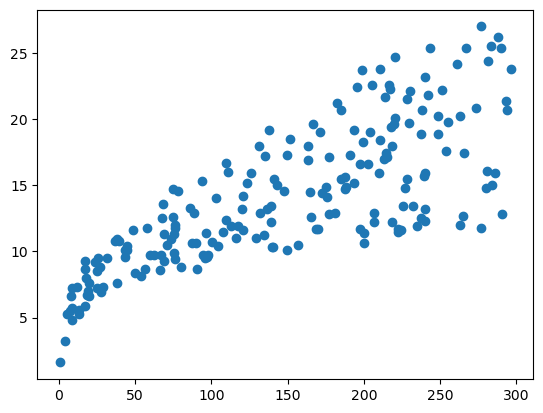

PyObject <matplotlib.collections.PathCollection object at 0x7fa7d2b92f70>

In [35]:
scatter(tv, sales)

In [36]:
using PyPlot


In [37]:
p = plt

PyObject <module 'matplotlib.pyplot' from '/Users/edrlab/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [38]:
plt.ioff()
plt.scatter(tv, sales)
plt.plot(x -> x)
plt.show()

LoadError: (in a Julia function called from Python)
JULIA: MethodError: no method matching iterate(::var"#7#8")
Closest candidates are:
  iterate(!Matched::Union{LinRange, StepRangeLen}) at range.jl:664
  iterate(!Matched::Union{LinRange, StepRangeLen}, !Matched::Int64) at range.jl:664
  iterate(!Matched::T) where T<:Union{Base.KeySet{var"#s79", var"#s78"} where {var"#s79", var"#s78"<:Dict}, Base.ValueIterator{var"#s77"} where var"#s77"<:Dict} at dict.jl:693
  ...
Stacktrace:
  [1] jlwrap_iterator(o::Function)
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:144
  [2] pyjlwrap_getiter(self_::Ptr{PyCall.PyObject_struct})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:125
  [3] macro expansion
    @ ~/.julia/packages/PyCall/BD546/src/exception.jl:95 [inlined]
  [4] #107
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:43 [inlined]
  [5] disable_sigint
    @ ./c.jl:458 [inlined]
  [6] __pycall!
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:42 [inlined]
  [7] _pycall!(ret::PyCall.PyObject, o::PyCall.PyObject, args::Tuple{var"#7#8"}, nargs::Int64, kw::Ptr{Nothing})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:29
  [8] _pycall!(ret::PyCall.PyObject, o::PyCall.PyObject, args::Tuple{var"#7#8"}, kwargs::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:11
  [9] (::PyCall.PyObject)(args::Function; kwargs::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:86
 [10] (::PyCall.PyObject)(args::Function)
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:86
 [11] top-level scope
    @ In[38]:3
 [12] eval
    @ ./boot.jl:360 [inlined]
 [13] include_string(mapexpr::typeof(REPL.softscope), mod::Module, code::String, filename::String)
    @ Base ./loading.jl:1116
 [14] softscope_include_string(m::Module, code::String, filename::String)
    @ SoftGlobalScope ~/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl:65
 [15] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/execute_request.jl:67
 [16] #invokelatest#2
    @ ./essentials.jl:708 [inlined]
 [17] invokelatest
    @ ./essentials.jl:706 [inlined]
 [18] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/eventloop.jl:8
 [19] (::IJulia.var"#15#18")()
    @ IJulia ./task.jl:411

In [39]:
using Gadfly


In [40]:
point = layer(x=rand(10), y=rand(10), Geom.point, Geom.line)
line = layer(x=rand(10), y=rand(10), Geom.point, Geom.line)
plot(line, )

LoadError: (in a Julia function called from Python)
JULIA: MethodError: no method matching iterate(::Layer)
Closest candidates are:
  iterate(!Matched::Union{LinRange, StepRangeLen}) at range.jl:664
  iterate(!Matched::Union{LinRange, StepRangeLen}, !Matched::Int64) at range.jl:664
  iterate(!Matched::T) where T<:Union{Base.KeySet{var"#s79", var"#s78"} where {var"#s79", var"#s78"<:Dict}, Base.ValueIterator{var"#s77"} where var"#s77"<:Dict} at dict.jl:693
  ...
Stacktrace:
  [1] jlwrap_iterator(o::Layer)
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:144
  [2] pyjlwrap_getiter(self_::Ptr{PyCall.PyObject_struct})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyiterator.jl:125
  [3] macro expansion
    @ ~/.julia/packages/PyCall/BD546/src/exception.jl:95 [inlined]
  [4] #107
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:43 [inlined]
  [5] disable_sigint
    @ ./c.jl:458 [inlined]
  [6] __pycall!
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:42 [inlined]
  [7] _pycall!(ret::PyCall.PyObject, o::PyCall.PyObject, args::Tuple{Vector{Layer}}, nargs::Int64, kw::Ptr{Nothing})
    @ PyCall ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:29
  [8] _pycall!
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:11 [inlined]
  [9] #pycall#113
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:83 [inlined]
 [10] pycall
    @ ~/.julia/packages/PyCall/BD546/src/pyfncall.jl:83 [inlined]
 [11] plot(args::Vector{Layer}; kws::Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ PyPlot ~/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:177
 [12] plot(args::Vector{Layer})
    @ PyPlot ~/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:174
 [13] top-level scope
    @ In[40]:3
 [14] eval
    @ ./boot.jl:360 [inlined]
 [15] include_string(mapexpr::typeof(REPL.softscope), mod::Module, code::String, filename::String)
    @ Base ./loading.jl:1116
 [16] softscope_include_string(m::Module, code::String, filename::String)
    @ SoftGlobalScope ~/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl:65
 [17] execute_request(socket::ZMQ.Socket, msg::IJulia.Msg)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/execute_request.jl:67
 [18] #invokelatest#2
    @ ./essentials.jl:708 [inlined]
 [19] invokelatest
    @ ./essentials.jl:706 [inlined]
 [20] eventloop(socket::ZMQ.Socket)
    @ IJulia ~/.julia/packages/IJulia/e8kqU/src/eventloop.jl:8
 [21] (::IJulia.var"#15#18")()
    @ IJulia ./task.jl:411